<center><h1>Accute_Inflamation_Tree_Prediction</h1></center>
<br>
<br>

Name: 
<br>Yitong Ouyang
Github Username: 
<br>Yvette0512

## 1. Decision Trees as Interpretable Models

### (a) Obtain Data

Get the Accute Inamations Data Set

In [74]:
import chardet

with open('./HW5_Datasets/diagnosis.data', 'rb') as f:
    result = chardet.detect(f.read())
    
print(result['encoding'])

UTF-16


In [75]:
import pandas as pd
import io
with open('./HW5_Datasets/diagnosis.data', 'r', encoding='utf-16') as file:
    data = file.read()

# data
df = pd.read_csv(io.StringIO(data), sep='\t', header=None) #header

# print(df.head())

# Create a dictionary to map the old column names to new column names
col_mapping = {
    0: 'Temperature',
    1: 'Nausea',
    2: 'Lumbra_Pain',
    3: 'Urine_pushing',
    4: 'Micturition_pains',
    5: 'Burning_swelling',
    6: 'Inflammation',
    7: 'Nephritis'
}

# Use the rename() method to apply the mapping to the DataFrame
df = df.rename(columns=col_mapping)
df = df.replace(',', '.', regex=True)

# print(df.head())
df

,Temperature,Nausea,Lumbra_Pain,Urine_pushing,Micturition_pains,Burning_swelling,Inflammation,Nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [76]:
df_encoded = df.replace('no', 0, regex=True)
df_encoded = df_encoded.replace('yes', 1, regex = True)
df_encoded

,Temperature,Nausea,Lumbra_Pain,Urine_pushing,Micturition_pains,Burning_swelling,Inflammation,Nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


### (b) Build a decision tree

In [77]:
my_dict = df_encoded.to_dict()
print(type(my_dict))

<class 'dict'>


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import export_text
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Split the data into features and target
X = df_encoded.drop(['Inflammation', 'Nephritis'], axis=1)
y = df_encoded[['Inflammation', 'Nephritis']]
              
# Create a DecisionTreeClassifier object and fit it to the data
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Print the tree
from sklearn.tree import export_text
tree_rules = export_text(clf, feature_names=X.columns.tolist())
print(tree_rules)

|--- Temperature <= 37.95
|   |--- Urine_pushing <= 0.50
|   |   |--- class: 0
|   |--- Urine_pushing >  0.50
|   |   |--- class: 1
|--- Temperature >  37.95
|   |--- Lumbra_Pain <= 0.50
|   |   |--- class: 0
|   |--- Lumbra_Pain >  0.50
|   |   |--- Nausea <= 0.50
|   |   |   |--- class: 0
|   |   |--- Nausea >  0.50
|   |   |   |--- Urine_pushing <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Urine_pushing >  0.50
|   |   |   |   |--- class: 0



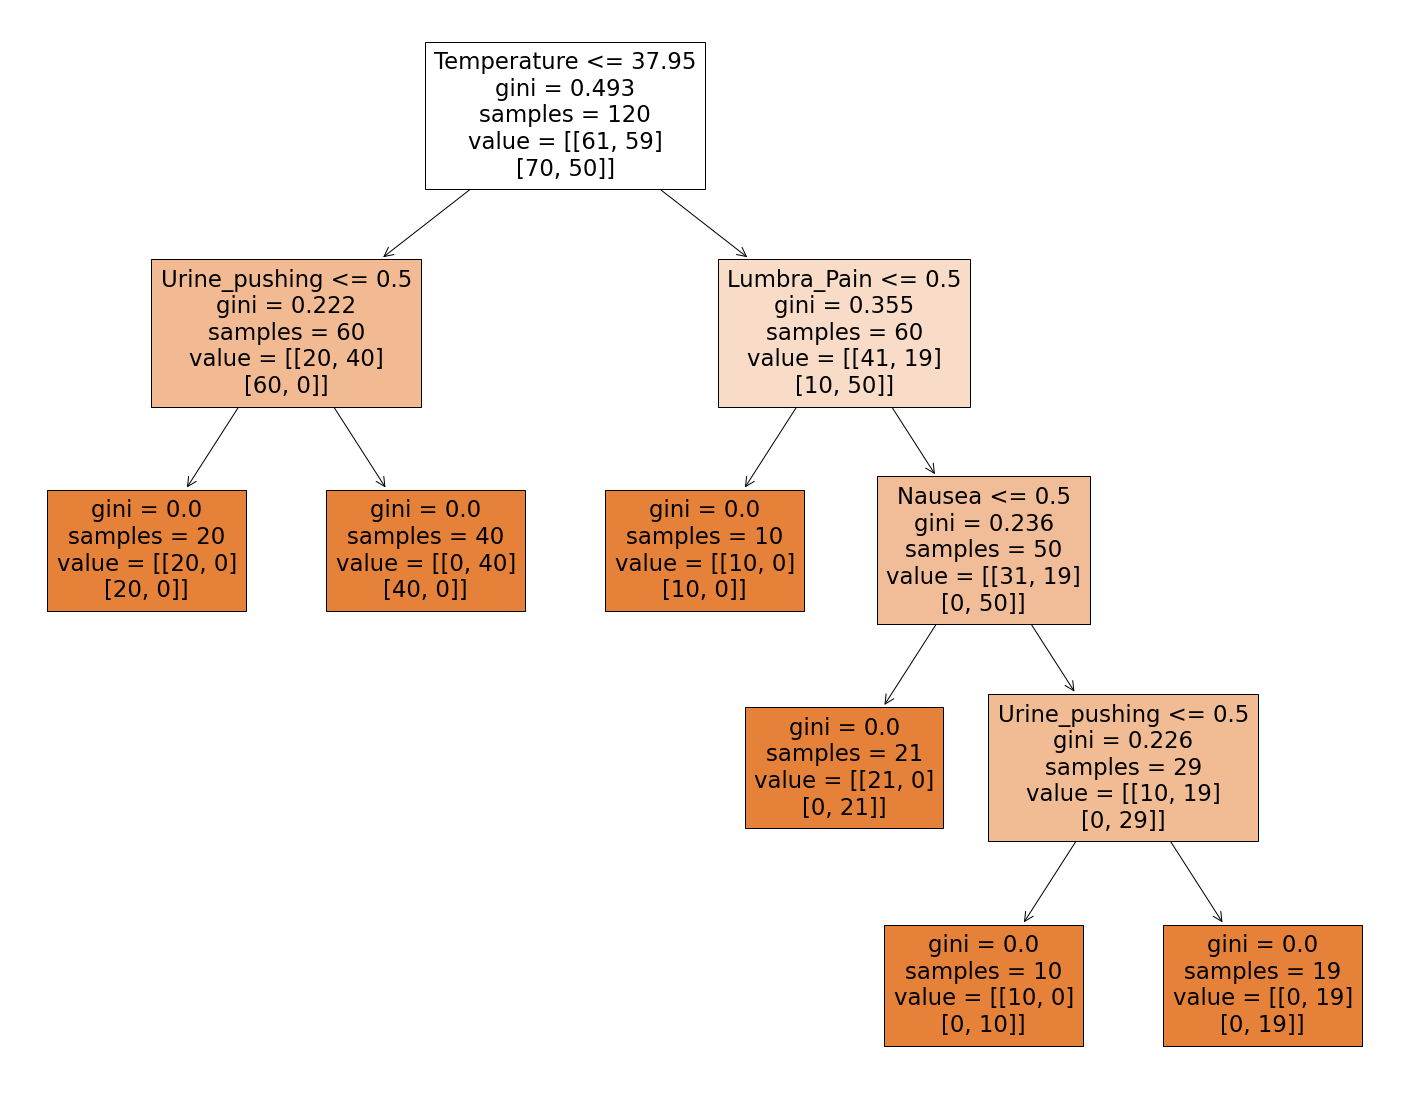

In [83]:
from sklearn import tree
fig = plt.figure(figsize = (25, 20))
_= tree.plot_tree(clf, feature_names=X.columns.tolist(), 
                  class_names=y.columns.tolist(), filled = True)

### (c) Convert the decision rules

In [24]:
#code provided by the instructor:

import numpy as np
from sklearn import datasets
from sklearn import tree
# Load iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Build decision tree classifier
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X, y)

dotfile = open("dt.dot", 'w')
tree.export_graphviz(dt, out_file=dotfile, feature_names=iris.feature_names)
dotfile.close()

In [25]:
from sklearn.tree import _tree
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
                    for i in tree_.feature]
    print("def tree({}):".format(", ".join(feature_names)))
    def recurse(node, depth):
        indent = " " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else: # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))
    recurse(0, 1)

In [26]:
tree_to_code(dt, list(iris.feature_names))

def tree(sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)):
 if petal length (cm) <= 2.449999988079071:
  return [[50.  0.  0.]]
 else: # if petal length (cm) > 2.449999988079071
  if petal width (cm) <= 1.75:
   if petal length (cm) <= 4.950000047683716:
    if petal width (cm) <= 1.6500000357627869:
     return [[ 0. 47.  0.]]
    else: # if petal width (cm) > 1.6500000357627869
     return [[0. 0. 1.]]
   else: # if petal length (cm) > 4.950000047683716
    if petal width (cm) <= 1.550000011920929:
     return [[0. 0. 3.]]
    else: # if petal width (cm) > 1.550000011920929
     if sepal length (cm) <= 6.949999809265137:
      return [[0. 2. 0.]]
     else: # if sepal length (cm) > 6.949999809265137
      return [[0. 0. 1.]]
  else: # if petal width (cm) > 1.75
   if petal length (cm) <= 4.8500001430511475:
    if sepal width (cm) <= 3.100000023841858:
     return [[0. 0. 2.]]
    else: # if sepal width (cm) > 3.100000023841858
     return [[0. 1. 0.]]
   els

In [27]:
def tree_to_pseudo(tree, feature_names):
    '''
     Outputs a decision tree model as if/then pseudocode
     Parameters:
     -----------
     tree: decision tree model
     The decision tree to represent as pseudocode
     feature_names: list
     The feature names of the dataset used for building the decision tree
     '''
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
#     print(type(features))
    value = tree.tree_.value
    def recurse(left, right, threshold, features, node, depth=0):
        indent = " " * depth
        if (threshold[node] != -2):
            print(indent,"if ( " + str(features[node]) + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent,"}")
            else:
                    print(indent,"return " + str(value[node]))
    recurse(left, right, threshold, features, 0)

#For the remainder of this example, we remove the last element in clfs and ccp_alphas, 
#because it is the trivial tree with only one node.

In [28]:
feature_names = ['Temperature','Nausea','Lumbra_Pain',
                 'Urine_pushing','Micturition_pains', 'Burning_swelling',
                 'Inflammation', 'Nephritis']
tree_to_pseudo(clf, feature_names)

 if ( Temperature <= 37.95000076293945 ) {
  if ( Urine_pushing <= 0.5 ) {
  } else {
  }
 } else {
  if ( Lumbra_Pain <= 0.5 ) {
  } else {
   if ( Nausea <= 0.5 ) {
   } else {
    if ( Urine_pushing <= 0.5 ) {
    } else {
    }
   }
  }
 }


### (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

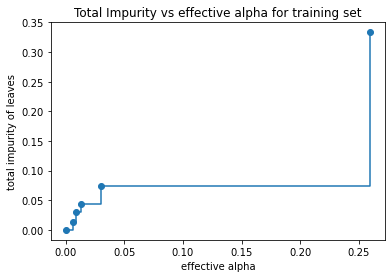

In [30]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [34]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X, y)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.25979602791196993


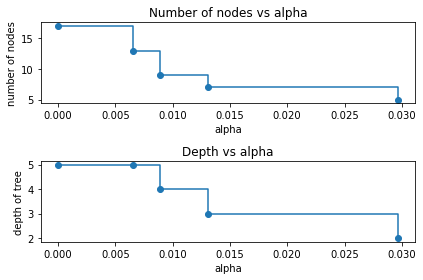

In [35]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()